# Employee Attrition - Training the model

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

employee_data = pd.read_csv("data/prepared-employee_attrition.csv",index_col=0)
#employee_data.set_index(employee_data.iloc[0], inplace=True)
employee_data.dtypes

Age                                    int64
Attrition                               bool
BusinessTravel                       float64
DailyRate                              int64
DistanceFromHome                       int64
Education                              int64
EmployeeCount                          int64
EmployeeNumber                         int64
EnvironmentSatisfaction                int64
Gender                                 int64
HourlyRate                             int64
JobInvolvement                         int64
JobLevel                               int64
JobSatisfaction                        int64
MonthlyIncome                          int64
MonthlyRate                            int64
NumCompaniesWorked                     int64
Over18                                  bool
OverTime                                bool
PercentSalaryHike                      int64
PerformanceRating                      int64
RelationshipSatisfaction               int64
StandardHo

# Splitting The Data

Without specifying anything the test set is double the size of the validation set

array([<AxesSubplot: ylabel='0'>], dtype=object)

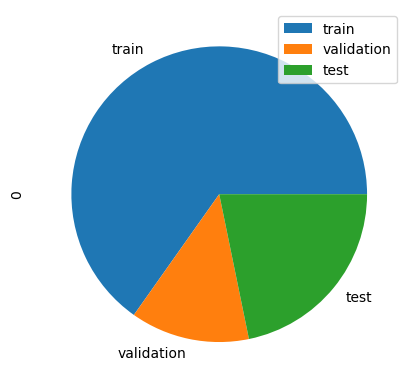

In [167]:
X = employee_data.loc[:, employee_data.columns != 'Attrition']
y = employee_data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y)

pd.DataFrame([len(y_train), len(y_val), len(y_test)], index=['train', 'validation', 'test']).plot(kind='pie', subplots=True)



So first we have to fix that with test_size

array([<AxesSubplot: ylabel='0'>], dtype=object)

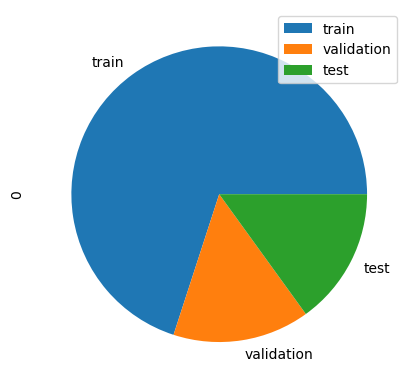

In [168]:
my_test_and_val_size = 0.3

X = employee_data.loc[:, employee_data.columns != 'Attrition']
y = employee_data['Attrition']
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, test_size=my_test_and_val_size)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full, test_size=0.5)

pd.DataFrame([len(y_train), len(y_val), len(y_test)], index=['train', 'validation', 'test']).plot(kind='pie', subplots=True)
    
    
    

After that we want a equal distribution of our labels (stratify)

<AxesSubplot: title={'center': 'test'}, ylabel='Attrition'>

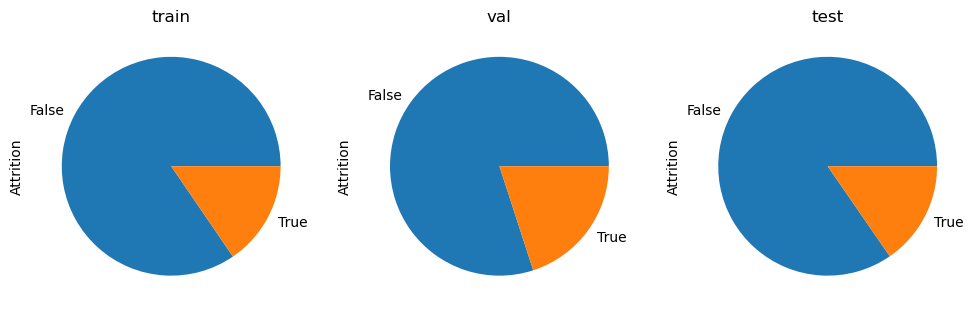

In [169]:
 fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
y_train.value_counts().plot(kind='pie', ax=ax1, title='train')
y_val.value_counts().plot(kind='pie', ax=ax2, title='val')
y_test.value_counts().plot(kind='pie', ax=ax3, title='test')

In [170]:
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, test_size=my_test_and_val_size, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full, test_size=0.5, stratify=y_test_full)

<AxesSubplot: title={'center': 'test'}, ylabel='Attrition'>

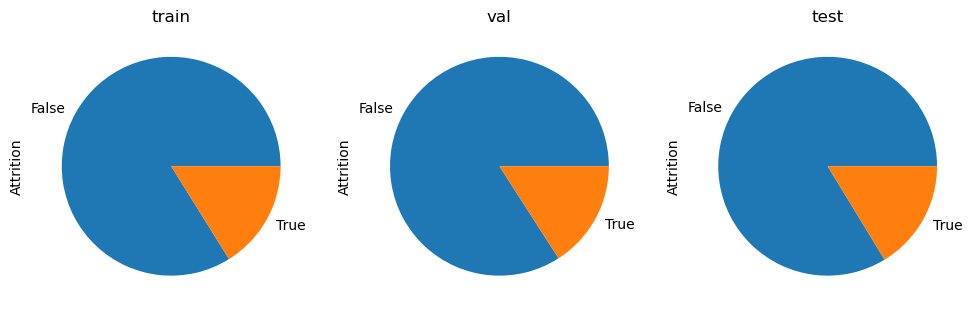

In [171]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
y_train.value_counts().plot(kind='pie', ax=ax1, title='train')
y_val.value_counts().plot(kind='pie', ax=ax2, title='val')
y_test.value_counts().plot(kind='pie', ax=ax3, title='test')

# Training The Model

## Baseline

In [172]:
from sklearn.dummy import DummyClassifier

In [173]:
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score))

Accuracy: 83.71%


## Decision Tree

In [177]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_val)
accuracy_score = metrics.accuracy_score(y_val, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score))

Accuracy: 75.91%


### Nice we are performing worse :) igkms 

In [189]:
def train_and_find_best_depth(X_train, X_val, y_train, y_val, do_print):
    result = None
    accuracy_max = -1
    for curr_max_depth in range(1, 15):
        dt_model = DecisionTreeClassifier(max_depth=curr_max_depth)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.accuracy_score(y_val, y_pred)
        
        if accuracy_score >= accuracy_max:
            accuracy_max = accuracy_score
            result = curr_max_depth
        if do_print:
            print('max depth {}: {:.2%} accuracy on validation set.'.format(curr_max_depth, accuracy_score))
    if do_print:
        print('-' * 20)
    print('best max depth {} has {:.2%} accuracy.'.format(result, accuracy_max))
    return result

In [190]:
 best_max_depth = train_and_find_best_depth(X_train, X_val, y_train, y_val, True)

max depth 1: 84.09% accuracy on validation set.
max depth 2: 85.45% accuracy on validation set.
max depth 3: 85.45% accuracy on validation set.
max depth 4: 84.55% accuracy on validation set.
max depth 5: 82.73% accuracy on validation set.
max depth 6: 81.36% accuracy on validation set.
max depth 7: 81.36% accuracy on validation set.
max depth 8: 80.45% accuracy on validation set.
max depth 9: 80.45% accuracy on validation set.
max depth 10: 80.00% accuracy on validation set.
max depth 11: 78.64% accuracy on validation set.
max depth 12: 78.64% accuracy on validation set.
max depth 13: 77.73% accuracy on validation set.
max depth 14: 79.55% accuracy on validation set.
--------------------
best max depth 3 has 85.45% accuracy.


### Finally performing better than random

In [194]:
dt_model = DecisionTreeClassifier(max_depth=best_max_depth)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score))


Accuracy: 86.43%


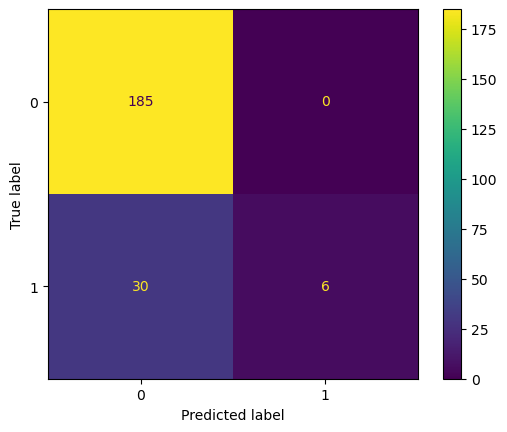

In [198]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

In [200]:
print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('F1 Score: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))


Accuracy: 86.43%
Recall: 16.67%
Precision: 100.00%
F1 Score: 28.57%


# Cross Validation 

In [203]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_model, X, y, scoring='accuracy', cv=5)
scores.mean()


0.8544217687074831

In [206]:
scores = cross_val_score(dt_model, X, y, scoring='recall', cv=5)
scores.mean()

0.19441489361702127

In [209]:
scores = cross_val_score(dt_model, X, y, scoring='f1', cv=5)
scores.mean()

0.29817348156522827

In [212]:
from sklearn.ensemble import RandomForestClassifier

X = employee_data.loc[:, employee_data.columns != 'Attrition']
y = employee_data['Attrition']

train_X, test_X, train_y, test_y = train_test_split(X, y)
rf_model = RandomForestClassifier()
rf_model.fit(train_X, train_y)
pred_y = rf_model.predict(test_X)
accuracy_score = metrics.accuracy_score(pred_y, test_y)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(test_y, pred_y)))
print('Recall: {:.2%}'.format(metrics.recall_score(test_y, pred_y)))
print('Precision: {:.2%}'.format(metrics.precision_score(test_y, pred_y)))
print('F1 Score: {:.2%}'.format(metrics.f1_score(test_y, pred_y)))

Accuracy: 86.96%
Recall: 14.55%
Precision: 88.89%
F1 Score: 25.00%
